# Scipy 패키지가 제공하는 검정 명령

## [ 뮤. 기댓값 모수 에 대한 귀무가설 검정 ]

```

1. 이항검정(Binomial Test) : 베르누이 분포 모수 u 검정 
(검정통계량 : 1이 나온 횟수), '베르누이 통계량(표본의 합) ~ 이항분포' 성질 활용
즉, 통계량 분포 = 이항분포


2. 카이제곱검정(Chi-squared Test) : 카테고리 분포 모수 벡터u 검정 
(검정통계량 : 표본분산을 정규화한 값), 적합도 검정법 사용

즉, 통계량 분포 != 다항분포. why? 다항분포는 스칼라값이 아님. 통계량은 스칼라값이어야 함
즉, 스칼라값이 나오는 통계량을 만들어야 함 => 통계량 분포로 활용 => 검정통계량으로 활용
(9.5.1)


3. 카이제곱 독립검정(Chi-squared Contingency Test) : 범주형 변수 간 상관관계 검정


4. 단일표본 z검정(One-sample z-Test)


5. 단일표본 t검정(One-sample t-Test) : 정규분포 모수 기댓값 검정
(검정통계량 : 스튜던트 t분포를 갖는 t통계량)


6. 독립표본 t검정(Independent two-sample t-Test) : 두 정규분포의 모수 기댓값 동일한지 검정
(검정통계량 : 두 분포의 분산이 같을 때, 다를 때 검정통계량이 다름)


7. 대응표본 t검정(Paired two-sample t-Test) : 두 정규분포의 모수 기댓값이 동일핮니 검정
단, paired-two-sample을 구성 -> 표본평균 자리에 (표본값 차이의 평균) 이 들어감.


```

## [ 분산 모수 에 대한 귀무가설 검정 ]

```

1. 등분산검정(Equal-variance Test)


```

## [ 확률분포가 정규분포인지 검정 ]

```

1. 정규성검정(Normality Test)


```

# 검정 과정

```

1) 확률변수 생성 (모수 지정, scipy.stats 모델)
2) 실제 데이터 및 검정 대상 지정 
3) 검정 진행 (scipy.stats 검정 모델)

```

# 1. 베르누이 확률변수의 이항검정 시뮬레이션

    - H0 : u = 0.5

### 1) 10개 샘플링 결과, 귀무가설과 다른 결과 => 귀무가설 기각?


In [13]:
# H0 : u = u0 = 0.5
# 데이터 갯수(샘플링) N = 10, 1이 나온 횟수 = 7

# 1. 확률변수 생성
N = 10
mu_0 = 0.5
np.random.seed(0)
rv = sp.stats.bernoulli(mu_0)

# 2. 샘플링
x = rv.rvs(N)

# 3. 샘플링 결과, 1이 나온 횟수
n = np.count_nonzero(x)
n

# 실험 결과 : 모수로 0.5를 지정 후, 샘플링을 했더니, 1이 5번이 아닌 7번 출력됨. 그렇다면, 실제 모수가 0.5라는 귀무가설은 기각되어야 하는가?

7

### 2) 베르누이 확률변수의 모수 검정 : 이항검정

    - 이항검정 결과, 유의확률이 약 0.34. u=0.5라는 귀무가설은 기각될 수 없다.
    
    
```

**이항검정**
이항검정은 이항분포를 이용하여 베르누이 확률변수의 모수  𝜇 에 대한 가설을 조사하는 검정 방법이다. 
사이파이 stats 서브패키지의 binom_test 명령은 이항검정의 유의확률을 계산한다. 
디폴트 귀무가설은  𝜇=0.5 이다.

scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')

x: 검정통계량. 1이 나온 횟수
n: 총 시도 횟수
p: 귀무가설의  𝜇 값
alternative: 양측검정인 경우에는 'two-sided', 단측검정인 경우에는 'less' 또는 'greater'


```

In [14]:
# 베르누이 확률변수의 모수 검정 
# 이항검정 결과, 유의확률이 약 0.34. u=0.5라는 귀무가설은 기각될 수 없다.

sp.stats.binom_test(n,N,p=mu_0)

0.3437499999999999

### 3) 100개 샘플링 결과


In [20]:
# 1. 확률변수 생성
N = 100
mu_0 = 0.5
rv = sp.stats.bernoulli(mu_0)

# 2. 샘플링
x = rv.rvs(N,random_state=0)

# 3. 샘플링 결과, 1이 나온 횟수
n = np.count_nonzero(x)
n

49

### 4) 100개 샘플링 결과에 대한 이항검정

- 유의확률이 매우 크므로, 귀무가설은 기각되지 않음. 귀무가설 하 충분히 나올 수 있는 샘플링 결과

In [21]:
sp.stats.binom_test(n, N)

0.9204107626128206

### 연습문제

동전을  𝑁 번 던져 앞면이 나오는 횟수를 측정했다. 다음 질문에 답하여라.

1. 𝑁=10 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까?


2. 𝑁=1000 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까? 
   이 때  1∼𝑁 의 횟수 범위 중에서 동전이 공정하다고 이야기할 수 있는 횟수의 범위(비율)는  𝑁=10 일 때와 비교하여 넓은가 혹은 좁은가?
   
   

#### 풀이 (자습)

In [43]:
# 1. 𝑁=10 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까?

# 1. 확률변수 생성
mu = 0.5
N = 10 #10번 던지기
sig_lev = 0.1
rv = sp.stats.bernoulli(mu)

# 2. 검정 실시 (반복)
def test(N):
    for i in range(0,N+1):

        if sp.stats.binom_test(i,N) <= sig_lev:
            print("앞면 횟수 : {}, pvalue : {}".format(i, sp.stats.binom_test(i,N)))
            
count = 0
def num_ok(N):
    for i in range(0,N+1):

        if sp.stats.binom_test(i,N) <= sig_lev:
            global count
            count += 1
            
    return count          

# 3. 검정 결과 : 앞면이 0, 1, 9, 10번 나올 경우, 동전은 공정하지 않다.
test(10)
print("유의확률 벗어난 횟수 : {}".format(num_ok(10)))

앞면 횟수 : 0, pvalue : 0.001953125
앞면 횟수 : 1, pvalue : 0.021484374999999997
앞면 횟수 : 9, pvalue : 0.021484374999999997
앞면 횟수 : 10, pvalue : 0.001953125
유의확률 벗어난 횟수 : 4


In [45]:
# 2. 𝑁=1000 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까?

# 1. 확률변수 생성
mu = 0.5
N = 1000 #1000번 던지기
sig_lev = 0.1
rv = sp.stats.bernoulli(mu)

# 2. 검정 실시 (반복)
count = 0
def num_ok(N):
    for i in range(0,N+1):

        if sp.stats.binom_test(i,N) <= sig_lev:
            global count
            count += 1
            
    return count
    
print("유의확률 벗어난 횟수 : {}".format(num_ok(1000)))

유의확률 벗어난 횟수 : 948


#### 풀이 (정답)

In [ ]:
# 1. 𝑁=10 이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야 동전이 공정하지 않다고 이야기 할 수 있을까?

def detect(N):
    N1 = N
    pvalue1 = np.array([sp.stats.binom_test(n,N1) for n in range(N1+1)])
    fair_range1 = np.where(pvalue1 > 0.1)
    fair_start1, fair_end1 = fair_range1[0][0], fair_range1[-1][-1]
    print("N = {}일 때, 공정한 경우 : 앞면이 나온 횟수가 {}~{}일 때".format(N1,fair_start1,fair_end1))
    
    plt.plot(pvalue1, "r--")
    plt.hlines(y=0.1, xmin=0, xmax=N1)

N = 10일 때, 공정한 경우 : 앞면이 나온 횟수가 2~8일 때


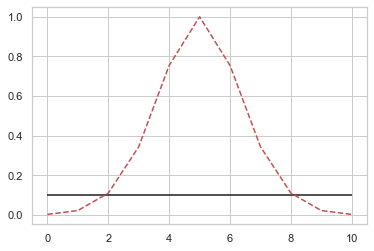

In [66]:
detect(10)    

N = 1000일 때, 공정한 경우 : 앞면이 나온 횟수가 474~526일 때


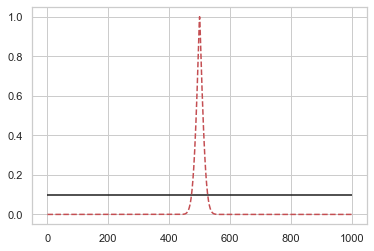

In [67]:
detect(1000)

### 연습문제

```

다음 코드를 실행하면 어느 식당의 매출과 팁(tip) 데이터를 구할 수 있다.

import seaborn as sns
tips = sns.load_dataset("tips")

하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 
열마다 성별(sex), 흡연유무(smoker), 점심/저녁(time) 등을 나타내는 데이터 있다.


```


**Q. 이항검정을 사용하여 다음 문제를 풀어라. 유의수준은 10%다.**

(1) 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

(2) 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?


   

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.tail(1)

,total_bill,tip,sex,smoker,day,time,size
243,18.78,3.0,Female,No,Thur,Dinner,2


In [22]:
# (1) 여자손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

# 이항검정 사용. 베르누이 분포의 기대값 모수에 대한 검정 진행
# 여성손님 중 비흡연자 수 = 검정통계량
# sp.stats.binom_test(검정통계량)

# 1. 검정통계량 = 여성손님 중 비흡연자 수
tips_fe = tips[tips['sex']=='Female']
tips_fe_no = tips_fe[tips_fe['smoker']=='No']

# 2. 단측 검정 진행. H0 = u = 0.5 / Ha = u > 0.5
# 시행횟수 인자 = 54+33, 비흡연자 + 흡연자 중, 비흡연자 대상 단측검정 진행

# 3. 단측 검정 시행 결과, 유의확률이 유의수준(10%)보다 낮아 귀무가설 기각 가능. 대립가설 채택 가능.(비흡연자가 더 많음)
sp.stats.binom_test(tips_fe_no.shape[0],n=54+33,alternative='greater')

0.015709055116923068

In [61]:
# (2) 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

# 이항검정 사용. 베르누이 분포의 기대값 모수에 대한 검정 진행
# 저녁에 오는 여자손님 중 비흡연자 수 = 검정통계량
# 전체 시행횟수 = 저녁,여자,흡연 + 저녁,여자,비흡연
# 단측검정 시행. H0 : u = 0.5 / Ha : u > 0.5 (비흡연자가 더 많다.)

# 1. 검정통계량 = 저녁, 여자, 비흡연
tips_di = tips[tips.time=='Dinner']
tips_di_fe = tips_di[tips_di.sex == 'Female']
tips_di_fe_no = tips_di_fe[tips_di_fe.smoker=='No']

# 2. 베르누이 시행(흡연 / 비흡연) 횟수 = 52 (23/29)
tips_di_fe.smoker.value_counts()

# 3. 단측검정 시행
sp.stats.binom_test(29,n=52,alternative='greater')

# 4. 검정 시행 결과, 유의확률이 유의수준보다 커, 귀무가설 기각할 수 없다. 따라서, 비흡연자가 더 많다고 할 수 없다.

0.2442278346899461

# 2. 카테고리 확률변수의 카이제곱 검정 시뮬레이션
    
    
```

**카이제곱 검정**

사이파이 stats 서브패키지의 chisquare 명령은 카이제곱검정의 검정통계량과 유의확률을 계산한다. f_exp이 주어지지 않는 경우의 디폴트 귀무가설은  𝜇=(1𝐾,…,1𝐾) 이다.

scipy.stats.chisquare(f_obs, f_exp=None)

f_obs : 데이터 행렬
f_exp : 기댓값 행렬

```

### 예제 : 실제 데이터에 대한 검정

데이터 개수  𝑁=10 , 귀무가설 모수  𝜇0=(0.25,0.25,0.25,0.25) , 실제 데이터  (0,3,5,2) 인 경우 대해 카이제곱검정 명령을 실시해보자.

In [78]:
# 1. 카테고리 확률변수 생성
N = 10
k = 4
mu_0 = np.ones(k)/k
rv = sp.stats.multinomial(1,mu_0)

# 2. 데이터 저장
data = np.array([0,3,5,2])

# 3. 검정실시
sp.stats.chisquare(data)

# 4. 검정결과
# 0.16 p-value. 만약 유의수준이 10%라도, 실제 데이터가 0,3,5,2가 나오더라도 귀무가설을 기각할 수 없다

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

### 예제 : 실제 데이터에 대한 검정

데이터 개수  𝑁=100 , 귀무가설 모수  𝜇0=(0.25,0.25,0.25,0.25) , 실제 데이터  (37,32,20,11) 인 경우 대해 카이제곱검정 명령을 실시해보자.

In [83]:
# 1. 카테고리 확률변수 생성
N = 100
k = 4
mu_0 = np.ones(k)/k
rv = sp.stats.multinomial(1,mu_0)

# 2. 데이터 저장
data = np.array([37,32,20,11])

# 3. 검정실시
sp.stats.chisquare(data)

# 4. 검정결과
# 0.01보다 적은 p-value. 실제 데이터가 (37,32,20,11)로 나오는 경우는 귀무가설 하 매우 희귀한 경우. 따라서, 귀무가설 기각

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

### 연습문제

6면체 주사위를 5번 던졌다. 5번 모두 6이 나왔다면 주사위가 공정하다는 귀무가설의 유의확률은 얼마인가?
   

#### 풀이 (자습)

In [85]:
# 시행횟수 = 5, 실제 데이터 = (1,0,0,0,0,5) or ...
# 귀무가설 = H0 = u = (1/6,1/6, ... ,1/6)
# 이 때, 귀무가설의 유의확률은? = 귀무가설 가정 분포 상 검정통계량의 위치?

# 1. 카테고리 확률변수 생성
N = 5
k = 6
mu_0 = np.ones(k)/k
rv = sp.stats.multinomial(1,mu_0)

# 2. 실제 데이터 저장
data = np.array([0,0,0,0,0,5])

# 3. 검정
sp.stats.chisquare(data)

Power_divergenceResult(statistic=25.000000000000004, pvalue=0.00013933379118562602)

# 3. 카이제곱 독립검정

    - 실수값 x, y 의 상관관계 <= 상관계수로 판단
    - 범주형 x, y 의 상관관계 <= 카이제곱 독립검정

* 상관관계 : 한 변수의 값이 달라지면, 다른 변수의 값도 변동

* 모델 생성 시, 제외해야할 서로 상관관계가 있는 범주형 변수, 특징을 판별 시 카이제곱 독립검정 활용

```

**카이제곱 독립검정**

- 사이파이의 chi2_contingency() 명령은 이러한 검정을 수행.  

- 디폴트 귀무가설 : 상관관계 없음

- 𝑋 의 값에 따른 각각의  𝑌 분포가 2차원 표(contingency table)의 형태로 주어지면 독립인 경우의 분포와 실제 y 표본본포의 차이를 검정통계량으로 계산. 
- 이 값이 충분히 크다면  𝑋 와  𝑌 는 상관관계가 있음. 
- chi2_contingency() 명령의 결과는 튜플로 반환되며 첫번째 값이 검정통계량, 두번째 값이 유의확률이다.

```

### 연습문제

예를 들어 데이터 사이언스 스쿨 수업을 들었는가의 여부가 나중에 대학원에서 머신러닝 수업의 학점과 상관관계가 있는지를 알기 위해 데이터를 구한 결과가 다음과 같다고 하자.

- 데이터 사이언스 스쿨 수업을 듣지 않은 경우 즉,  𝑋 가 0이면 A, B, C 학점( 𝑌  값)을 받은 학생의 분포가  4,16,20 이다.

- 데이터 사이언스 스쿨 수업을 들은 사람의 경우 즉,  𝑋 가 1일 때 A, B, C 학점( 𝑌  값)을 받은 학생의 분포가  23,18,19 다.

이 결과로부터 데이터 사이언스 스쿨 수업을 들었는가의 여부가 머신러닝 수업의 학점과 상관관계가 있다고 말할 수 있는가?
   

In [88]:
# 두 변수의 관찰 값 테이블 생성

obs = np.array([[4,16,20],[23,18,19]])
sp.stats.chi2_contingency(obs)

# 리턴결과의 2번째 값인 p-value가 약 0.7%이다. 따라서, 상관관계가 없다는 귀무가설을 기각할 수 있다.(상관관계 있다.)

(9.910060890453046, 0.00704786570249751, 2, array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

# 4. 단일표본 z 검정

    - 분산의 값을 정확히 알고 있는 정규분포의 표본에 대한 기댓값을 조사하는 검정방법
    - 현실에서 분산의 값을 정확히 알고 있는 경우가 거의 없어, 사용 거의 안함

# 5. 단일표본 t 검정 (one-sample t-test)

    - 검정통계량 : 스튜던트 t분포를 갖는 t통계량
    
```

단일표본 t검정(One-sample t-test)은 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다. 검정통계량으로 스튜던트 t분포를 가진 t통계량을 사용한다.

사이파이의 stats 서브 패키지의 ttest_1samp 명령을 사용한다. ttest_1samp 명령의 경우에는 디폴트 모수가 없으므로 기댓값을 나타내는 popmean 인수를 직접 지정해야 한다.

scipy.stats.ttest_1samp(a, popmean)

a: 표본 데이터 배열
popmean: 귀무가설의 기댓값

```

### 예제

    - 데이터 갯수 N = 10, 실제 모수 u = 0인 경우에 대해 단일표본 t검정 실시

In [94]:
# 1. 확률변수 생성

N = 10
mu_0 = 0
rv = sp.stats.norm(mu_0)

# 2. 샘플링 실시
x = rv.rvs(N,random_state=0)

# 3. 단일표본 t-검정 실시
sp.stats.ttest_1samp(x,popmean=0)   # popmean = 0, 귀무가설의 기댓값

# 4. 검정결과
# 유의수준보다 낮은 p-value로 귀무가설 기각 가능. 실제 모수가 0 임에도, 0이 아니라고 검정결과가 나옴
# type-1 error 발생 (= 귀무가설이 맞음에도 잘못 검정)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

### 예제

    - 데이터 갯수 N = 100, 실제 모수 u = 0인 경우에 대해 단일표본 t검정 실시

In [95]:
# 1. 확률변수 생성

N = 100
mu_0 = 0  # 실제 모수
rv = sp.stats.norm(mu_0)

# 2. 샘플링 실시
x = rv.rvs(N,random_state=0)

# 3. 단일표본 t-검정 실시
sp.stats.ttest_1samp(x,popmean=0)  # popmean = 0, 귀무가설의 기댓값

# 4. 검정결과
# 유의수준보다 p-value가 매우 높음. 귀무가설 기각할 수 없음.

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

### Type-1 error : 귀무가설을 잘못 기각 (기각하면 안됨)
### Type-2 error : 귀무가설을 잘못 채택 (채택하면 안됨)

# 6. 독립표본 t-검정

    - 두 개의 독립적인 정규분포의 기댓값이 동일한지 검정
    
    - 두 분포의 분산이 같을 때, 다를 때 사용하는 검정통계량이 다름
        - 등분산 검정 : 두 분포의 분산이 같은지 확인
    
    
    1) 두 정규분포의 분산이 같은 경우
    2) 두 정규분포의 분산이 다른 경우
    
```

독립표본 t검정은 사이파이 stats 서브패키지의 ttest_ind 명령을 사용하여 계산. 
독립표본 t검정은 두 정규분포의 분산값이 같은 경우와 같지 않은 경우에 사용하는 검정통계량이 다르기 때문에 equal_var 인수를 사용하여 이를 지정해 주어야 함. 
두 분포의 분산이 같은지 다른지는 다음에 나올 등분산검정(equal-variance test)을 사용하면 된다. 만약 잘 모르겠으면 equal_var=False로 놓으면 됨.

scipy.stats.ttest_ind(a, b, equal_var=True)

a: 1번 표본 집합 데이터
b: 2번 표본 집합 데이터
equal_var: 두 표본 집합의 분산이 같은경우에는 True
    
    
```

### 연습문제

1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.

- 1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점. 평균 74.1점
- 2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점 . 평균 69.2점

1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?

In [101]:
# 1. 1반과 2반의 정규분포를 그렸을 때, 분포의 기댓값이 다른지 확인

x1 = [80,75,85,50,60,75,45,70,90,95,85,80]
x2 = [80,85,70,80,35,55,80]

# 2. 독립표본 t-검정

sp.stats.ttest_ind(x1,x2,equal_var=True)

# 3. 높은 p-value로, 1반과 2반의 정규분포 상 기댓값이 동일하다는 귀무가설 기각할 수 없음
# 따라서, 1반의 실력이 2반보다 좋다고 할 수 없다.

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

# 7. 대응표본 t-검정

    - 두 개의 독립적인 정규분포의 기댓값이 동일한지 검정
    
    - 독립표본 t-검정 과 다른점
        * 집단의 표본에 대해 paired-two-sample 구성 -> 표본평균 대신, (표본차 평균) 대입
        
    - ex) A~E라는 학생이, 스쿨 수강 전과 후의 시험성적을 놓고, 수강 전과 후의 시험점수 분포 기댓값이 동일한지 검정하는 것.
    이처럼, 스쿨 수강에 따른 1:1 대응(pair) 관계를 알면, 표본간의 차이의 영향을 없앨 수 있음(다른 특강의 영향을 보다 정확히 추정 가능)


```


대응표본 t검정은 ttest_rel 명령을 사용한다.

ttest_rel(a, b)

a: 1번 표본 집합 데이터
b: 2번 표본 집합 데이터
    
    
```

# 8. 등분산검정

- 등분산검정 : 독립표본 t-검정 (ttest_ind)을 시행하기 전, 두 분포의 분산이 같은지 검정이 필요. 이때 활용


- bartlett, fligner, levene 검정을 주로 사용

```


사이파이의 stats 서브패키지는 이를 위한 bartlett, fligner, levene 명령을 제공

sp.stats.bartlett(x1, x2)
sp.stats.fligner(x1, x2)
sp.stats.levene(x1, x2)

```


# 9. 정규성 검정

```


사이파이 에서 제공하는 정규성검정 명령어

콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : scipy.stats.ks_2samp
샤피로-윌크 검정(Shapiro–Wilk test) : scipy.stats.shapiro
앤더스-달링 검정(Anderson–Darling test) : scipy.stats.anderson
다고스티노 K-제곱 검정(D'Agostino's K-squared test) : scipy.stats.mstats.normaltest


StatsModels에서 제공하는 정규성검정 명령어

콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : statsmodels.stats.diagnostic.kstest_normal
옴니버스 검정(Omnibus Normality test) : statsmodels.stats.stattools.omni_normtest
자크-베라 검정(Jarque–Bera test) : statsmodels.stats.stattools.jarque_bera
릴리포스 검정(Lilliefors test) : statsmodels.stats.diagnostic.lillifors


```

- 가장 기본적인 검정 : KS검정
    * KS검정 : 본래 정규성검정을 위한 것이 아님. 두 표본이 같은 분포를 따르는 지 확인할 수 있는 방법(정규분포를 기준으로 다른 표본의 분포를 비교하여 정규성 검정 진행!)
